### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.


### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### `Datasets Information:`


*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating



*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)



*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use


**`Please provide you insights wherever necessary.`**

### 1. Import the necessary packages - 2.5 marks

In [14]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
import os

import matplotlib.pyplot as plt

import seaborn as sns

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [4]:
#changing working directory
%cd "C:\Users\Rajesh\Documents\Movie_Lens"

#Read the dataset
Data = pd.read_csv('Data.csv')
item = pd.read_csv('item.csv')
user = pd.read_csv('user.csv')


C:\Users\Rajesh\Documents\Movie_Lens


### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [18]:
#data dataset
Data.info
Data.shape
Data.describe
Data.isnull()

#item dataset
item.info
item.shape
item.describe
item.isnull()

#user dataset
user.info
user.shape
user.describe
user.isnull()



### 4. Find the number of movies per genre using the item data - 2.5 marks

In [5]:
item['year']= item['release date'].str[-4:]
item.sum(axis = 0, skipna = True) 

movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

### 5. Drop the movie where the genre is unknown - 2.5 marks

In [8]:
item = item[item['unknown'] != 1]


### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [11]:
item['total_genre']= item.loc[:, 'unknown':'Western'].sum(axis=1)
print(item[item['total_genre'] >= 2][['movie title','total_genre']])

#Number of moview with more than 1 genre
print('Number of movies with more than 1  : ',item[item['total_genre'] >= 2].shape[0])

             movie title  total_genre
0             Toy Story             3
1             GoldenEye             3
3            Get Shorty             3
4               Copycat             3
6        Twelve Monkeys             2
...                  ...          ...
1667  MURDER and murder             3
1668            Tainted             2
1671             Mirage             2
1677          B. Monkey             2
1678      Sliding Doors             2

[849 rows x 2 columns]
Number of movies with more than 1  :  849


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age. Use lineplot or countplot for release year.*

*HINT: Plot percentages in y-axis and categories in x-axis for ratings, gender and occupation*

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

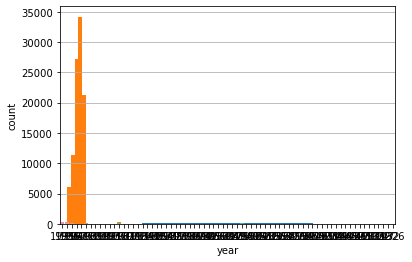

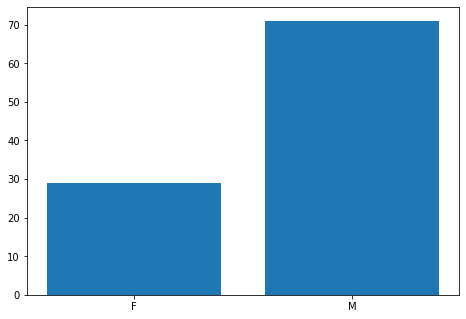

In [16]:
#a = 'My*cat*is*brown'
#print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

#print(a[10:])
#print(a[-5:])

user['age'].hist(bins=20)
Data['rating'].hist(bins=5)

#countplot for release year
ax = sns.countplot(x="year", data=item)
user1 = user.groupby(['gender'],as_index=False).count()
user1['percent'] = (user1['user id'] / user1['user id'].sum()) * 100
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(user1['gender'],user1['percent'])
plt.show()

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use `sum(axis=1)` store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

In [18]:
item1 = item.drop(['movie id', 'movie title', 'release date','total_genre'],axis=1)

#number of releases in a year
item1 = item1.groupby(['year']).sum()

item1['total']= item1.loc[:, 'unknown':'Western'].sum(axis=1)
item1 = (item1.div(item1['total'], axis= 0) * 100)
item1 = item1.drop(['total'],axis=1)

item1.style.background_gradient(cmap ='viridis').set_properties(**{'font-size': '12px'}) 
Data1 = Data.groupby(['movie id']).size()

Data1 = Data.groupby('movie id').agg({'movie id':'size', 'rating':'mean'}).rename(columns={'movie id':'count','rating':'avg rating'}).reset_index()

item2 = pd.merge(item, Data1, how='left', on=['movie id'])

#Total to get percentage number of release in a particular year

item3 = item2[item2['count'] >=100]

item3.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,year,total_genre,count,avg rating
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,1995,3,452,3.878319
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,1,0,0,1995,3,131,3.206107
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1995,3,209,3.550239
6,7,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1995,2,392,3.798469
7,8,Babe,01-Jan-1995,0,0,0,0,1,1,0,...,0,0,0,0,0,0,1995,3,219,3.995434


### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [19]:
#find the top 25 movies.Dataset merge happened previous step

item4 = item3.loc[1:25, ['movie title', 'avg rating']] 
print(item4.sort_values(by='avg rating',ascending=False))

             movie title  avg rating
11  Usual Suspects, The     4.385768
21           Braveheart     4.151515
22          Taxi Driver     4.120879
7                  Babe     3.995434
13          Postino, Il     3.967213
8      Dead Man Walking     3.896321
10        Seven (Se7en)     3.847458
6        Twelve Monkeys     3.798469
14   Mr. Holland's Opus     3.778157
3            Get Shorty     3.550239
23  Rumble in the Bronx     3.448276
24        Birdcage, The     3.443686
12     Mighty Aphrodite     3.418478
1             GoldenEye     3.206107


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [17]:
#Merge all the datasets
Data_new = pd.merge(Data, user, how='left', on=['user id'])
Data_new = pd.merge(Data_new, item, how='left', on=['movie id'])

#validate the gender
Data_new1 = Data_new.groupby('gender').agg({'Drama':'sum', 'Romance':'sum', 'Sci-Fi':'sum'})
Data_new1.head()

,Drama,Romance,Sci-Fi
gender,,,
F,11008.0,5858.0,2629.0
M,28887.0,13603.0,10101.0
